# An Introduction to Market Basket Analysis
Data taken from [Kaggle](https://www.kaggle.com/shazadudwadia/supermarket). I picked this dataset because I wanted to gain experience applying Market Basket Analysis with a small dataset. Market Basket Analysis is a data mining technique and rule-based algorithm that can learn through relationships and can be utilized within ecommerce and marketing strategies. Through this analysis we can make smarter decisions that will benefit the consumer. For example, Market Basket Analysis helps provide insights that allows us to determine where to place items in a store. For example, we tend to see coffee, tea, and cereal placed in the same isle. As well, if a customer purchases one item we might consider targeting them with advertisements with another item. With MBA we can determine how to consider more advantageous group discounts, and even go one step further in developing a recommmendor system for ecommerce shoppers.

Links for Reference: \
https://towardsdatascience.com/mba-for-breakfast-4c18164ef82b \
https://www.youtube.com/watch?v=WGlMlS_Yydk&t=8s \
https://towardsdatascience.com/association-rules-2-aa9a77241654 \
https://towardsdatascience.com/complete-guide-to-association-rules-2-2-c92072b56c84
https://www.hackerearth.com/blog/developers/beginners-tutorial-apriori-algorithm-data-mining-r-implementation/


MBA is considered a type of rule based learning. A rule might look like: '*If* a customer bought tortilla chips, *then* they will buy salsa.' This example might seem obvious, however we can create more specific association rules such as:

*If* a customer is female, aged 20-40, and buys diapers between 5 and 7pm, *then* customer will also buy wine.

Mining retail datasets like this is done to find a number of relations:

* **Complementary products**: products which are often bought together, like chips and salsa
* **Substitute products**: products which replace each other, like Coke and Pepsi
* **Trigger products**: products which when bought, trigger other purchases 
* **Common Baskets**: combinations of products that are often bought together

#### Step 1
In order to run the market basket analysis, we must first start with a list of transactions: 
    
    Transaction 1: 'Apple', 'Beer', 'Rice', 'Chicken'
    Transaction 2: 'Apple', 'Beer', 'Rice' 
    Transaction 3: 'Apple', 'Beer'
    Transaction 4: 'Apple', 'Bananas'
    Transaction 5: 'Milk', 'Beer', 'Rice', 'Chicken'
    Transaction 6: 'Milk', 'Beer', 'Rice'
    Transaction 7: 'Milk', 'Beer'
    Transaction 8: 'Apple', 'Bananas'

    dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]
 
#### Step 2:
Next use [TransactionEncoder](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/) to transform the list of transactional items into dummy variables which is suitable for computating text data such as in Machine Learning and Statistical Analysis methods.

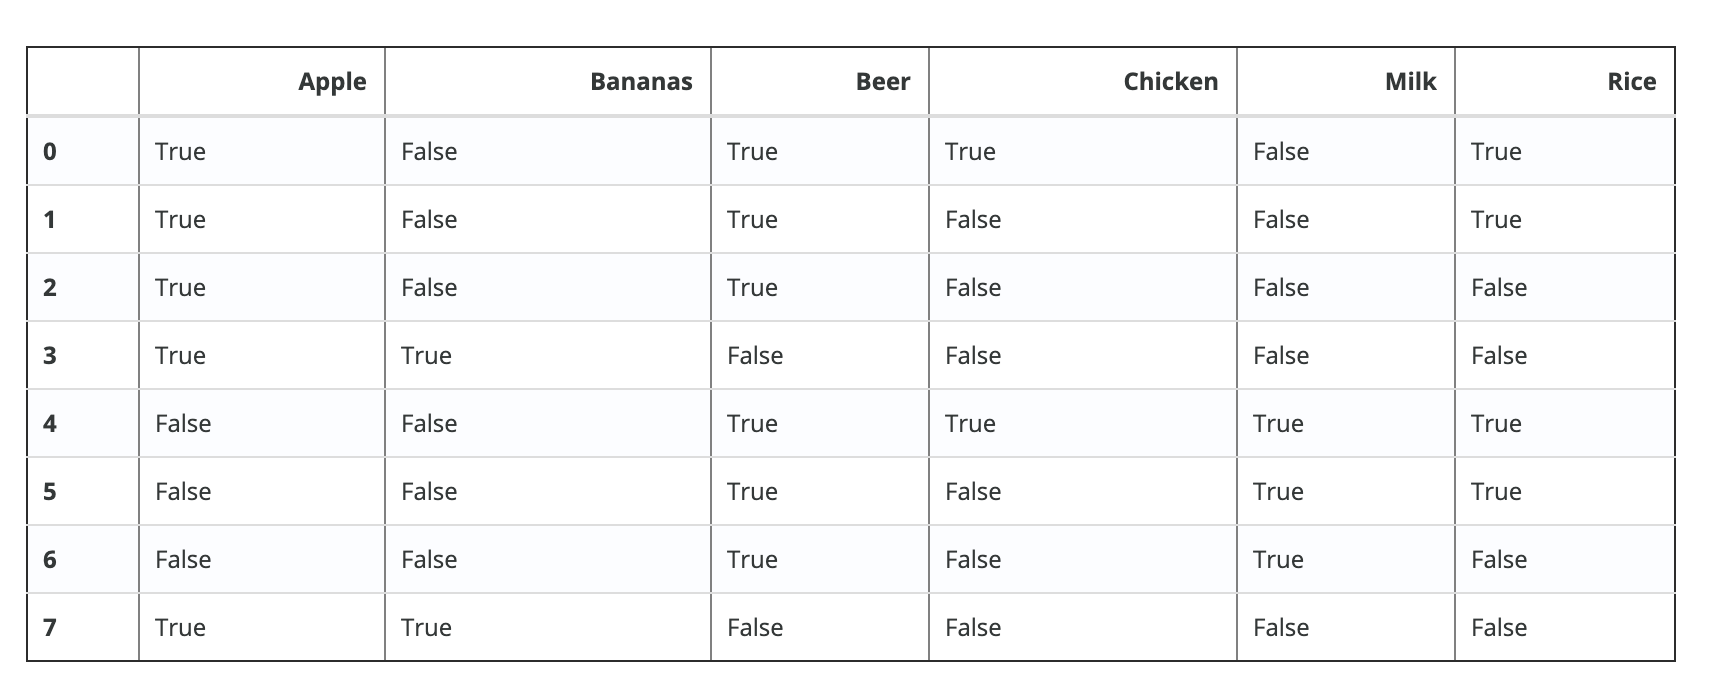

#### Step 3:
Once the dataframe is setup correctly, we can run Aipori Algorithm which is an association rule algorithm. Association Rules "help uncover all such relationships between items from huge databases". The Aipori Algorithm groups the list of items into antecedents and consequents. The antecedent is what the customer purchased such as bread and eggs, while the consequent is the purchase result (https://towardsdatascience.com/association-rules-2-aa9a77241654). For example, if a user purchases milk and sugar (antecendent) then they will purcahse coffee (consquent). We can see from the sample dataset above that if a customer buys beer (antecendent) then the customer buys rice (Consequent) for 50% of transactions (4 transacations/ 8 total transactions). We can see here that the antecedent and consequent are setup as an *if* (antecedent) *else* (consequent) statement.

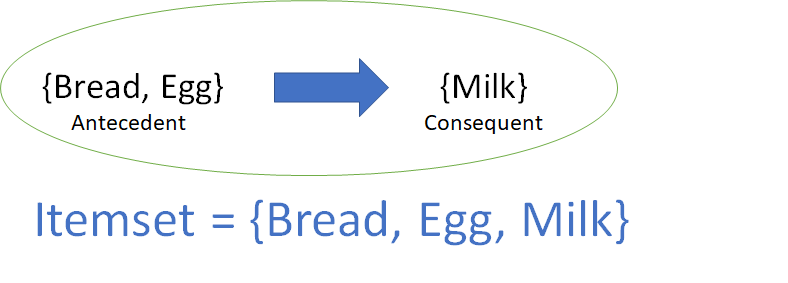


While we might be able to determine through common behaviors that when a customer buys eggs and bread they will also buy milk. The Aipori Algorithm quantifies the likelihood of a customer who purchases eggs and bread who will also buy milk.

**Aipori Algorithm provides three components: Support, Confidence, Conviction, and Lift**<br/><br/>


$$  \text{support}(X \cup Y) = \frac{\text{# of transactions with X and Y together}}{\text{total number of transactions}} $$<br/><br/>


$$  \text{support}(apple) = \frac{\text{5}}{\text{8}} = 0.625 $$<br/><br/>

We can then set a support threshold where the support value means the item has a meaningful outcome on sales. Therefore identifying all items within all transactions where items contain a support threshold equal or greater than the set value.

Confidence signifies the likelihood of item Y being purchased with item X. This is also known as conidtional probablity P(Y|X). The conditional probability of P(Y|X) is the probability of itemset 𝑌 in all transactions given the transaction already contains 𝑋. The drawback of confidence is that it only takes into account the popularity of X, and not the popularity of Y. <br/><br/>

$$ \text{confidence}(X\rightarrow Y) = \frac{\text{support}(X\cup Y)}{\text{support}(X)} = \frac{\text{proportion of transactions with X and Y}}{\text{proportion of transactions with X}}$$ <br/><br/>


$$ \text{confidence}(milk, beer\rightarrow rice) = \frac{\text{support}(milk, beer\cup rice)}{\text{support}(rice)} = \frac{\frac{2}{8}}{\frac{4}{8}} = 0.5$$ <br/><br/>


Lift takes into account for popularity of Y which thus accomodates for the drawback present in calculating confidence. More precisely lift signifies the liklihood of item Y being purchased when item X is purchased, while taking into account the popularity of Y. If Lift > 1, then Y is likely bought with item X. Lift < 1, then Y is unlikely bought with item X. <br/><br/>


$$ \text{lift}(X\rightarrow Y) = \frac{\text{confidence}(X\rightarrow Y)}{\text{support}(Y)} = \frac{\frac{\text{support}(X\cup Y)}{\text{support}(X)}}{\text{support}(Y)} = \frac{\text{support}(X\cup Y)}{\text{support}(X)\times\text{support}(Y)}$$<br/><br/>

$$ \text{lift}(beer\rightarrow rice) = \frac{\frac{4}{8}}{\frac{6}{8}\times\frac{4}{8}} = 1.3 $$

The lift of purchasing beer and rice together is 1.3 which means that the likelihood of a customer buying both beer and rice together is 1.3 times more than the chance of purchasing beer alone.<br/><br/>

Leverage is the difference in support of the larger group, than would be expected if the antecedent and consequent were independent: <br/><br/>

$$\text{leverage}(X\rightarrow Y) = \text{support}(X\cup Y) - \text{support}(X) \times \text{support}(Y)$$<br/><br/>

$$\text{leverage}(beer\rightarrow rice) = \frac{4}{8} - \frac{6}{8} \times \frac{4}{8} = 0.125 $$<br/><br/>

Conviction is the measure of the dependence of the consequent on the antecedent: A high value denotes that we always purchase the C with the A. <br/><br/>

$$\text{conviction}(X\rightarrow Y) = \frac{1 - \text{support}(Y)}{1 - \text{confidence}(X\rightarrow Y)}$$

$$\text{conviction}(beer\rightarrow rice) = \frac{1 - \text{support}(rice)}{1 - \text{confidence}(beer\rightarrow rice)} = \frac{1 - \frac{4}{8}}{1 - \frac{\frac{4}{8}}{\frac{6}{8}}} = \frac{0.5}{0.33} = 0.17$$

#### Step 4: 
Create a recommendor system from lift value

### Step 1: Transform dataframe into a list

In [318]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as pl

# Import mlxtend packages
from mlxtend.preprocessing import TransactionEncoder
import itertools  

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [319]:
# Import as dataframe
df = pd.read_csv('MarketBasketAnalysis/GroceryStoreDataSet.csv', header = None)

In [320]:
# View first 5 rows of dataframe
df.head()

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [321]:
# Make dataframe into a list, where each list of items is a transaction:
# Transaction 1: Milk, Bread, Biscuit
# Transaction 2: Bread, Milk, Biscuit, Cornflakes
# Transaction 3: Bread, Tea, Bournvita

basket = []

df.values[0, 0].split(',')

for i in range(len(df)):
    basket.append(df.values[i, 0].split(','))

In [322]:
# View basket
basket

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

### Step 2: Transform input dataset into a one-hot encoded NumPy boolean array

In [323]:
# Instantiate
te = TransactionEncoder()

# Fit and Transform the data into True and False (1 and 0)
item = te.fit(basket).transform(basket)

# View items after transforming as boolean array
item[0:5]

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True]])

In [324]:
# Can also transform array from boolean to integer for when working with large datasets
item.astype("int")[0:5]

array([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [325]:
# Create DataFrame
df = pd.DataFrame(item, columns = te.columns_)
df.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


Before applying Aipori Algorithm, we can take a quick look at the relationships between the items by 

In [326]:
df.T.dot

<bound method DataFrame.dot of                 0      1      2      3      4      5      6      7      8  \
BISCUIT      True   True  False  False   True  False  False   True  False   
BOURNVITA   False  False   True  False  False   True  False  False  False   
BREAD        True   True   True   True  False   True  False   True   True   
COCK        False  False  False  False  False  False  False  False  False   
COFFEE      False  False  False  False  False  False  False  False  False   
CORNFLAKES  False   True  False  False  False  False   True  False  False   
JAM         False  False  False   True  False  False  False  False   True   
MAGGI       False  False  False   True   True  False   True   True   True   
MILK         True   True  False   True  False  False  False  False  False   
SUGER       False  False  False  False  False  False  False  False  False   
TEA         False  False   True  False   True   True   True   True   True   

                9     10     11     12     1

In [327]:
# df.T - Transpace the dataframe
df.T.dot(df.astype('int'))

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
BISCUIT,7,0,4,2,2,3,0,2,2,1,2
BOURNVITA,0,4,3,0,1,0,0,0,0,2,2
BREAD,4,3,13,1,3,1,2,3,4,4,4
COCK,2,0,1,3,3,2,0,0,0,0,0
COFFEE,2,1,3,3,8,4,0,0,1,4,1
CORNFLAKES,3,0,1,2,4,6,0,1,2,1,2
JAM,0,0,2,0,0,0,2,2,1,0,1
MAGGI,2,0,3,0,0,1,2,5,1,0,4
MILK,2,0,4,0,1,2,1,1,5,0,1
SUGER,1,2,4,0,4,1,0,0,0,6,0


BISCUIT        7
BOURNVITA      4
BREAD         13
COCK           3
COFFEE         8
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64
            BISCUIT  BOURNVITA  BREAD  COCK  COFFEE  CORNFLAKES  JAM  MAGGI  \
BISCUIT           7          0      4     2       2           3    0      2   
BOURNVITA         0          4      3     0       1           0    0      0   
BREAD             4          3     13     1       3           1    2      3   
COCK              2          0      1     3       3           2    0      0   
COFFEE            2          1      3     3       8           4    0      0   
CORNFLAKES        3          0      1     2       4           6    0      1   
JAM               0          0      2     0       0           0    2      2   
MAGGI             2          0      3     0       0           1    2      5   
MILK              2          0      4     0       1           2    1      1   
SUGER     

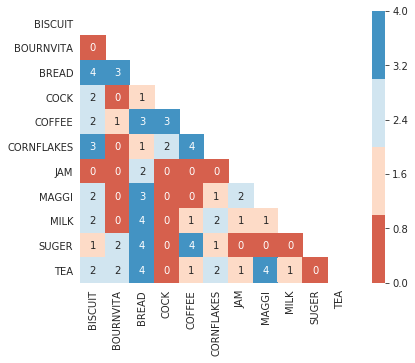

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###How many in total:
print(df.sum(axis = 0))

###make a contingency table - two-way frequency table
## The table allows us to view the frequency between categories. 
# For example There are 7 biscuits total, and twice when buscuits were bought, so was tea.
dftable = df.T.dot(df.astype('int'))
dftable = dftable
print(dftable)

#heatmap it
mask = np.zeros_like(dftable)
mask[np.triu_indices_from(mask)] = True
pal = sns.color_palette("RdBu", n_colors=4)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(dftable, mask=mask, vmax = 4, square=True, annot=True, cmap = pal)

Just by looking at this contingency heatmap which shows the frequency of each item purchased with another item. We can see some trends. For example, Bread is bought frequently with tea, sugar, milk, maggi, and coffee. As well, cornflakes and coffee were bought three times together. While for example, sugar and jam were never purachased together. While this is a first order attempt to look at the relationships, the Aipori Algorithm can provide an even more detail outline of relationships between multiple items which can provide much greater insight.

### Step 3: Aipori Algorithm

In [329]:
### create a df with all our items: threshold, names and len
### min_support = is the frequency of occurance in the dataset
### use_colnames is our output
### max_len is the upper length 
### Support - what porportions of transactions include this set of items or include this basket.

# When max_len = 3, itemsets range between 1 item, 2 items, and 3 items
# min_suport - 0.1, minimum of 10% of  frequency of occurance
apriori(df, min_support=0.1, use_colnames=True, max_len = 3)

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [330]:
# when max_len = 2, itemsets length ranges between 1 item and two items
items = apriori(df, min_support=0.01, use_colnames=True, max_len = 4)
items

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(TEA, BREAD, BISCUIT, MAGGI)"
79,0.10,"(CORNFLAKES, COFFEE, BISCUIT, COCK)"
80,0.05,"(BREAD, MILK, MAGGI, JAM)"
81,0.05,"(TEA, BREAD, JAM, MAGGI)"


In [331]:
# Set max_len = 4
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True, max_len = 4)

In [332]:
# Add a column to the DataFrame that includes the length of the itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
5,0.30,(CORNFLAKES),1
6,0.10,(JAM),1
7,0.25,(MAGGI),1
8,0.25,(MILK),1
9,0.30,(SUGER),1


In [333]:
# In this specific project, we only care about itemsets where length = 2
# and support is greater than and equal to 0.05 (5%)

items = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

items

,support,itemsets,length
11,0.20,"(BREAD, BISCUIT)",2
12,0.10,"(BISCUIT, COCK)",2
13,0.10,"(BISCUIT, COFFEE)",2
14,0.15,"(CORNFLAKES, BISCUIT)",2
15,0.10,"(BISCUIT, MAGGI)",2
16,0.10,"(MILK, BISCUIT)",2
17,0.10,"(TEA, BISCUIT)",2
18,0.15,"(BREAD, BOURNVITA)",2
19,0.10,"(SUGER, BOURNVITA)",2
20,0.10,"(TEA, BOURNVITA)",2


In [334]:
basket = [list(x) for x in items['itemsets']]

In [335]:
basket

[['BREAD', 'BISCUIT'],
 ['BISCUIT', 'COCK'],
 ['BISCUIT', 'COFFEE'],
 ['CORNFLAKES', 'BISCUIT'],
 ['BISCUIT', 'MAGGI'],
 ['MILK', 'BISCUIT'],
 ['TEA', 'BISCUIT'],
 ['BREAD', 'BOURNVITA'],
 ['SUGER', 'BOURNVITA'],
 ['TEA', 'BOURNVITA'],
 ['BREAD', 'COFFEE'],
 ['BREAD', 'JAM'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'SUGER'],
 ['TEA', 'BREAD'],
 ['COFFEE', 'COCK'],
 ['CORNFLAKES', 'COCK'],
 ['CORNFLAKES', 'COFFEE'],
 ['SUGER', 'COFFEE'],
 ['CORNFLAKES', 'MILK'],
 ['TEA', 'CORNFLAKES'],
 ['JAM', 'MAGGI'],
 ['TEA', 'MAGGI']]

In [336]:
# Instantiate
te = TransactionEncoder()

# Fit and Transform
item = te.fit(basket).transform(basket)

#Turn the encoded array into a DataFrame
df = pd.DataFrame(item.astype("int"), columns=te.columns_)
df.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0


In [337]:
x = apriori(df, min_support=0.01, use_colnames=True)

In [338]:
#take a look at the help for ways we can use this function
association_rules = association_rules(x, metric="lift", min_threshold=1)

In [339]:
association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(COCK),0.291667,0.125000,0.041667,0.142857,1.142857,0.005208,1.020833
1,(COCK),(BISCUIT),0.125000,0.291667,0.041667,0.333333,1.142857,0.005208,1.062500
2,(MILK),(BISCUIT),0.125000,0.291667,0.041667,0.333333,1.142857,0.005208,1.062500
3,(BISCUIT),(MILK),0.291667,0.125000,0.041667,0.142857,1.142857,0.005208,1.020833
4,(BREAD),(BOURNVITA),0.333333,0.125000,0.041667,0.125000,1.000000,0.000000,1.000000


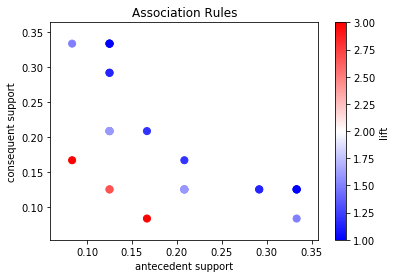

In [394]:
x = association_rules['antecedent support']
y = association_rules['consequent support']
    
color = association_rules['lift']
label = association_rules['lift']

plt.figure()
plt.scatter(x, y, c = color, s = 50, cmap='bwr')
plt.title('Association Rules')
plt.xlabel('antecedent support')
plt.ylabel('consequent support')
plt.colorbar(label='lift')

plt.show()

From the above figure we can see three groups between the antecedent support and consquent support according to lift. Where 

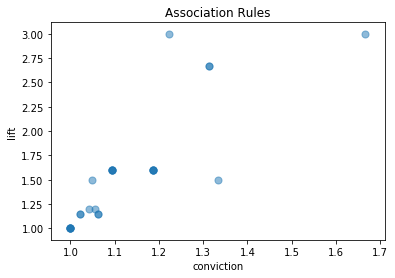

In [367]:
x = association_rules['conviction']
y = association_rules['lift']

plt.figure()
plt.scatter(x, y, s = 50, alpha = 0.5)
plt.title('Association Rules')
plt.xlabel('conviction')
plt.ylabel('lift')
plt.show()

### Step 4: Recommendor System

In [408]:
top_rated = association_rules[association_rules['antecedents'] == frozenset({'MILK'})].sort_values(by=['lift'], ascending=False)

In [409]:
top_rated

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(MILK),(CORNFLAKES),0.125,0.208333,0.041667,0.333333,1.600000,0.015625,1.1875
2,(MILK),(BISCUIT),0.125,0.291667,0.041667,0.333333,1.142857,0.005208,1.0625
13,(MILK),(BREAD),0.125,0.333333,0.041667,0.333333,1.000000,0.000000,1.0000


In [428]:
def recommendation(item):
    
    """
    A function that takes in a item and returns the top 2 items are recommended to purchase with this product
    
    Input: Item (string)
    Output: Top 2 recommended products
    
    """
    
    # where antecedents = item i.e. COFFEE, sort table by lift in ascending order
    top_rated = association_rules[association_rules['antecedents'] == frozenset({item})].sort_values(by=['lift'], ascending=False)
    
    # Create empty list for Products
    product = []

    # Create a table that lists the consequents from top_rated
    for i in np.arange(0, len(top_rated), 1):
        
        # Append product ID for consquents results 
        product.append(list(top_rated['consequents'].iloc[i]))

    #Create a dataframe with consequents Product
    product = pd.DataFrame(product, columns=['product recommendation'])
    
    # Return the top 2 from consequents product from the list
    
    return product.head(2)

In [429]:
recommendation('MILK')

,product recommendation
0,CORNFLAKES
1,BISCUIT


In [430]:
recommendation('COFFEE')

,product recommendation
0,COCK
1,SUGER


In [431]:
recommendation('BREAD')

,product recommendation
0,JAM
1,BOURNVITA
